# Week 3: Exploratory Data Analysis (EDA)
## Superstore Sales Dataset For April 2019.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_April_2019.csv"
df = pd.read_csv(url)

In [2]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [4]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,18324,18324,18324,18324,18324,18324
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,35,2201,16558,2201,35,35


### First Observations

The dataset contains 18,383 rows and 6 columns: Order ID, Product, Quantity Ordered, Price Each, Order Date, and Purchase Address.

Quantity Ordered and Price Each are numerical variables, while the remaining columns are categorical.

An immediate data quality concern is the presence of duplicate or invalid rows. Although the dataset has 18,383 rows, there are only 17,538 unique Order IDs, indicating 845 rows that are either duplicates or malformed records.

This assessment was based on the assumption that Order ID functions as the primary key, meaning each valid transaction should have a unique identifier.


### What this answers

- Which columns are affected

- How bad the problem is

- Whether dropping rows is safe

**Analyst rule**

- Missing Order ID / Product / Quantity / Price → row is broken

- Missing Address / Date → maybe recoverable

In [5]:
df.isnull().sum()

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

### What this reveals

- Rows where column names appear as values

- These are not data

- These must be removed

This is **data validation**

In [6]:
# Check for erroneous rows that will need to be removed.

df[df["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3036,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3209,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3618,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4138,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4645,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
# Remove erroneous rows.

df = df[df["Order ID"] != "Order ID"]

### Fix Data Types

In [8]:
# check data types

df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
# Convert columns to appropriate data types

df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])

df["Price Each"] = pd.to_numeric(df["Price Each"])

In [10]:
# recheck data types

df.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Create a Business Metric

In [11]:
# Added revenue per row.

df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99


**Notes**

1. Why is it dangerous to drop duplicates using only `Order ID`?

Because this is a transactional dataset where a single order can contain multiple products, `Order ID` is not row-unique. Dropping rows based only on `Order ID` would remove legitimate transaction lines, leading to data loss and inaccurate analysis.

2. Why must bad rows be removed before type conversion?

Bad rows must be removed before type conversion to ensure that numerical columns contain only valid numeric values. Leaving invalid rows in the dataset can cause conversion errors or force incorrect data types, which would compromise all downstream analysis.

3. Why is creating a `Sales` column better than recalculating every time?

Creating a `Sales` column improves efficiency, consistency, and accuracy by centralizing the business metric in one place. This allows the metric to be reused easily for aggregation, visualization, and analysis without repeated calculations or risk of inconsistency.

### Systematic Data Cleaning

In [13]:
# Create a Raw backup copy of cleaned data

df_raw = df.copy()

In [14]:
# Identify Fully Empty Rows.

df.isna().all(axis=1).sum()

np.int64(59)

In [15]:
df[df.isna().all(axis=1)] # Lets inspect them.

# then

df = df.dropna(how='all') # Drop fully empty rows.

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [16]:
# Convert columns to appropriate data types

df["Order Date"] = pd.to_datetime(df["Order Date"])

df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)

df["Price Each"] = df["Price Each"].astype(float)

C:\Users\Grace\AppData\Local\Temp\ipykernel_22604\2198867227.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"] = pd.to_datetime(df["Order Date"])


**Note**

This order is *critical.*

Cleaning → then typing[type conversion]

Not the other way around.

In [17]:
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Sales                      float64
dtype: object

### Exploratory Data Analysis (EDA)
- Now that the data is clean, we ask questions

**High-Level Business Questions**

Answer these with code + short explanations:

- What is the total revenue?

- Which product generates the most sales?

- Which city generates the most revenue?

- How does sales change over time (daily or monthly)?

**First we filter and sort the data.**

“Dates outside the primary analysis period are excluded to maintain temporal consistency.” (April 1st - 30th)

In [18]:
# filter for April data only

df = df[df["Order Date"].dt.month == 4]


In [19]:
# sort by order date 

df = df.sort_values(by="Order Date") # data reflects how events actually happened.

In [20]:
# Reset index 

df = df.reset_index(drop=True) # clean index after filtering

# Now we can answer some questions!

**What is the total revenue?**

In [21]:
df["Sales"].agg(['sum'])

sum    3385499.82
Name: Sales, dtype: float64

**Which product generates the most sales?**

In [22]:
df.groupby("Product")["Sales"].sum().sort_values(ascending=False)

Product
Macbook Pro Laptop            770100.00
iPhone                        485100.00
ThinkPad Laptop               388996.11
Google Phone                  348000.00
34in Ultrawide Monitor        247753.48
Apple Airpods Headphones      227850.00
27in 4K Gaming Monitor        220344.35
Flatscreen TV                 137700.00
Bose SoundSport Headphones    128487.15
27in FHD Monitor              110242.65
Vareebadd Phone                88000.00
LG Dryer                       46200.00
20in Monitor                   43226.07
LG Washing Machine             36600.00
Lightning Charging Cable       35446.45
USB-C Charging Cable           27102.60
Wired Headphones               24747.36
AA Batteries (4-pack)          10824.96
AAA Batteries (4-pack)          8778.64
Name: Sales, dtype: float64

**Which city generates the most revenue?**

In [23]:
# so we have to extract the city from the 'Purchase Address' column

df["City"] = df["Purchase Address"].str.split(",").str[1].str.strip()

df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
0,177831,Lightning Charging Cable,1,14.95,2019-04-01 03:09:00,"914 6th St, San Francisco, CA 94016",14.95,San Francisco
1,177687,Wired Headphones,1,11.99,2019-04-01 04:12:00,"23 Meadow St, San Francisco, CA 94016",11.99,San Francisco


In [24]:
# Then we can group by city and sum sales

df.groupby("City")["Sales"].sum().sort_values(ascending=False)

City
San Francisco    812423.20
Los Angeles      550099.08
New York City    446487.79
Boston           352764.39
Atlanta          284442.93
Seattle          275860.24
Dallas           250760.48
Portland         239978.12
Austin           172683.59
Name: Sales, dtype: float64

**How does sales change overtime (daily or monthly)?**
 
 To do that you have to:

- “Create a time bucket” (For this dataset, daily is the cleanest and most interpretable.)

- “Aggregate”

- “Explain trend”

In [25]:
#  Create a day column

df["Day"] = df["Order Date"].dt.day

df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Day
0,177831,Lightning Charging Cable,1,14.95,2019-04-01 03:09:00,"914 6th St, San Francisco, CA 94016",14.95,San Francisco,1
1,177687,Wired Headphones,1,11.99,2019-04-01 04:12:00,"23 Meadow St, San Francisco, CA 94016",11.99,San Francisco,1


In [26]:
# Aggregate sales by day

daily_sales = df.groupby("Day")["Sales"].sum()

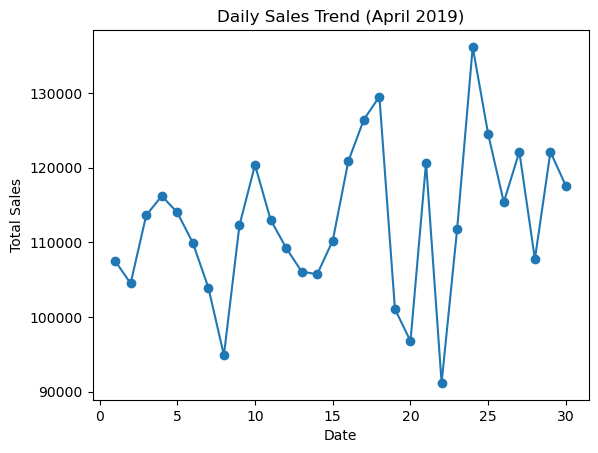

In [27]:
# plot daily sales for April

import matplotlib.pyplot as plt

daily_sales.plot(kind="line", marker="o")
plt.title("Daily Sales Trend (April 2019)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

**Key patterns and observations**

Daily sales exhibit high volatility, with sharp fluctuations throughout April. The trend shows frequent peaks and troughs rather than a smooth progression, indicating that sales are influenced by short-term factors rather than long-term seasonality.

Two notable sales peaks occurred around `April 18–19` and `April 24`, with the highest daily revenue recorded near April 24. In contrast, significant declines were observed around `April 8` and `April 21–22`, with the lowest sales occurring during the Easter period.

There is no clear recurring weekly or bi-weekly pattern, suggesting that the observed fluctuations are likely driven by specific calendar events or consumer behavior rather than regular cyclical demand.

**Contextual interpretation (hypotheses)**
Several dips and spikes align with known calendar events. The decline around April 15 may be associated with U.S. Tax Day, when consumers typically reduce discretionary spending. The spike on April 18 may reflect increased purchasing ahead of the Easter holiday weekend, followed by a sharp drop on Good Friday and Easter Sunday when retail activity is often reduced.

The peak observed on April 24 likely reflects post-holiday promotional activity or renewed consumer spending following the Easter period.

**These interpretations are hypotheses based on calendar context and should be validated with additional data such as promotions, store hours, or marketing campaigns.**

**Note**

Before performing time-based analysis, the dataset was filtered to the relevant time period and sorted chronologically by order date. The index was then reset to ensure a clean and consistent working dataset. This preparation ensures that subsequent aggregations and visualizations accurately reflect the true sequence of events.

### EDA summary

**Business Summary**

April sales performance was highly volatile and strongly influenced by external calendar events rather than steady demand. Revenue declined sharply around Tax Day and the Easter period, indicating short-term consumer spending constraints during financially or socially significant dates. Despite these dips, the business showed strong resilience, with a rapid post-holiday recovery that culminated in the highest sales peak on April 24. This pattern suggests that demand was deferred rather than lost, highlighting the importance of timing in revenue generation. Overall, April performance reflects an event-driven sales cycle with clear opportunities to better manage and monetize predictable demand swings.

**Key Insights**

***Event Sensitivity***

Revenue is event-driven rather than stable, with major fluctuations tied to calendar events such as Tax Day and Easter. This increases short-term forecasting risk but also creates predictable windows where targeted interventions can significantly influence performance.

***Post-Holiday Elasticity***

Consumer demand shows high post-holiday elasticity, as evidenced by the sharp rebound and monthly peak immediately following the Easter period. This indicates that spending is postponed not eliminated, creating a high-impact opportunity for post-event promotions.

***Holiday Friction***

Sales drop sharply during major holidays, suggesting that current sales channels underperform when consumers shift to non-routine behavior. This exposes a gap in the ability to capture demand during periods when physical shopping or normal purchasing patterns are disrupted.

**Business Recommendations**

- Front-load inventory and staffing ahead of major calendar events by increasing readiness 48 hours before holidays, capturing pre-event purchasing spikes driven by preparation behavior.

- Deploy counter-cyclical promotions around historically weak periods, such as Tax Day, using value-based or financial relief messaging to stabilize revenue during predictable dips.

- Institutionalize post-holiday campaigns by scheduling product launches, promotions, or clearance events immediately after major holidays to monetize rebound demand.

- Close the holiday sales gap with digital-first tactics, including flash sales and automated email or mobile campaigns, to capture at-home consumers during periods of reduced physical retail activity.